## Introduction

So far, we've coded our graphs using Matplotlib. In this lesson, we'll introduce Seaborn — a Python data visualization library that builds on Matplotlib.

The graphs we've built showed at most two variables (columns):

- Time versus number of coronavirus cases
- Temperature versus bikes rented
- Slowness in traffic versus lack of electricity

Seaborn enables us to easily show more than two variables on a graph. Below, we see a graph with five variables

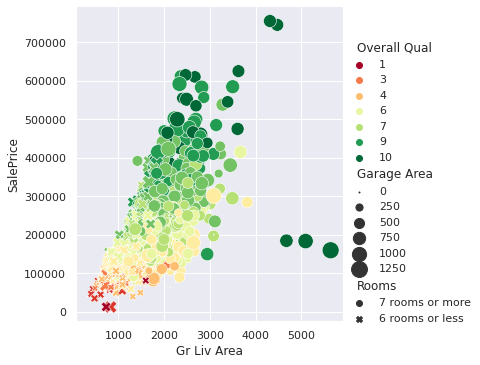

Although the graph shows five variables, we generated it with a single line of code. Behind the curtains, however, Seaborn used many lines of Matplotlib code to build the graph.

Throughout the lesson, we'll use a dataset about house characteristics and sale prices. The houses were sold between 2006 and 2010 in Ames, Iowa.

Professor Dean DeCock collected the data — he described the data collection process in [a paper](https://doi.org/10.1080/10691898.2011.11889627) he published in the Journal of Statistics Education. We can find the documentation for the dataset at [this link](https://s3.amazonaws.com/dq-content/307/data_description.txt).

Let's read in the data.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv('../../Datasets/housing.csv')

In [4]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1999 or older,7 rooms or more
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1999 or older,6 rooms or less
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1999 or older,6 rooms or less
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1999 or older,7 rooms or more
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1999 or older,6 rooms or less


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [6]:
housing.shape

(2930, 84)

In [7]:
housing.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Sale Type          object
Sale Condition     object
SalePrice           int64
Year               object
Rooms              object
Length: 84, dtype: object

## Seaborn

On the previous screen, we introduced a graph that shows five variables (columns):

- SalePrice: price of the sale in USD
- Gr Liv Area: above grade (ground) living area in square feet
- Overall Qual: quality ratings of the overall material and finish of the house
- Garage Area: garage area in square feet
- Rooms : number of rooms

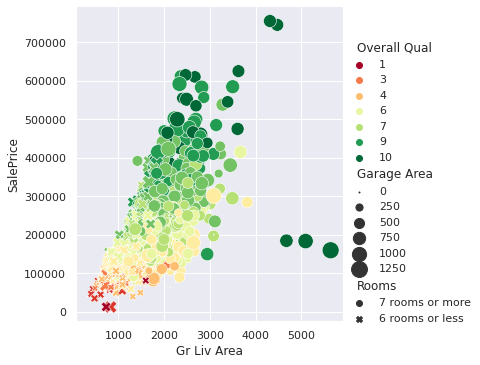

We'll start by plotting only two of these variables: SalePrice and Gr Liv Area. In the code below, we do the following:

- Import seaborn as sns — "sns" is the standard alias.
- Import matplotlib.pyplot as plt — "plt" is the standard alias.

- Call the sns.relplot() function to generate the plot.
- We pass in the housing DataFrame to the data parameter.
- We pass in the column names as strings to parameters x and y.
- By default, the sns.relplot() function generates a scatter plot.

- Call plt.show() to display the graph (this works because Seaborn uses Matplotlib code behind the curtains — just like Pandas).

In [14]:
fig = plt.figure()
fig.tight_layout()

<Figure size 640x480 with 0 Axes>

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


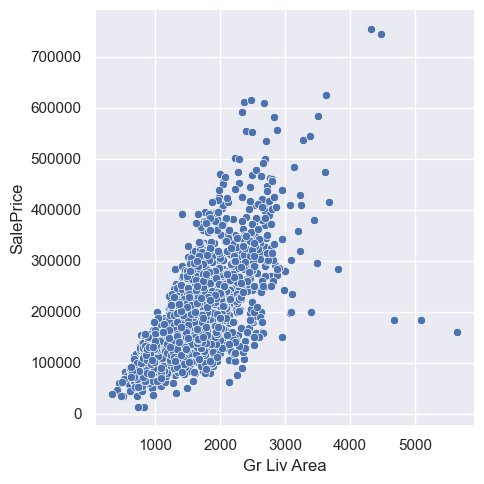

In [15]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

Visually, the graph uses Matplotlib defaults. To switch to Seaborn defaults, we need to call the [sns.set_theme() function](https://seaborn.pydata.org/generated/seaborn.set_theme.html):

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


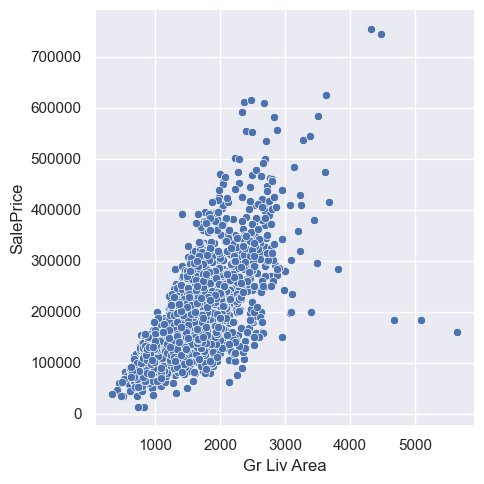

In [9]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

We need to call the sns.set_theme() function before generating the plot — before calling sns.relplot(). Once we call sns.set_theme(), all subsequent graphs will inherit the Seaborn style — we only need to call this function once.

## Variable Representation: Color

On the previous screen, we generated a scatter plot with two variables: Gr Liv Area and SalePrice. The scatter plot shows a clear positive correlation — the greater the living area, the bigger the sale price (typically, not always).

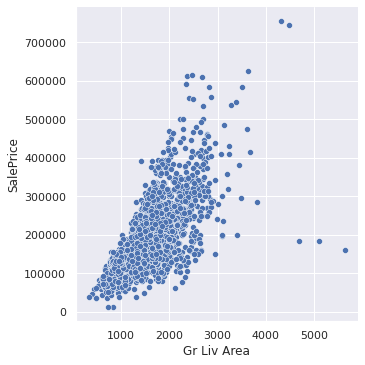

Notice that each dot (also called a marker) on the scatter plot is blue. We can change the color intensity of the dots to represent a new variable.

Below, we use the hue parameter to add the Overall Qual variable on the scatter plot. Recall that Overall Qual describes the quality ratings of the overall material and finish of the house.

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


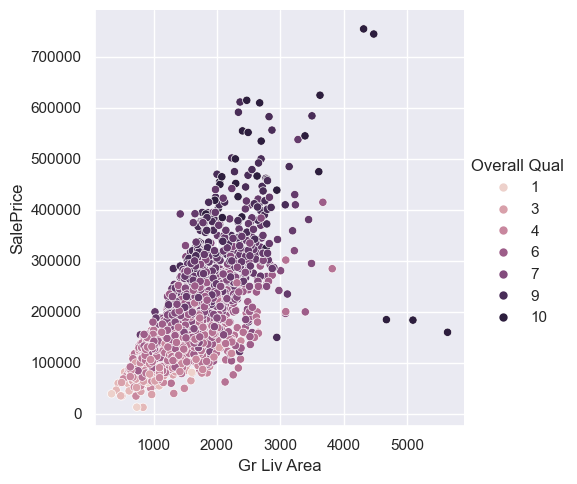

In [10]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
           hue='Overall Qual')
plt.show()

The values in the Overall Qual variable range from one to ten — one is equivalent to "very poor," and ten is equivalent to "very excellent" (per the documentation).

Seaborn matched lower ratings with lighter colors and higher ratings with darker colors. A pale pink represents a rating of one, while black represents a ten. Seaborn also generated a legend to describe which color describes which rating.

Let's say we want the colors to vary between red and green — where dark red means a rating of one and dark green means a rating of ten. We can make this change using the palette parameter with the 'RdYlGn' argument:

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


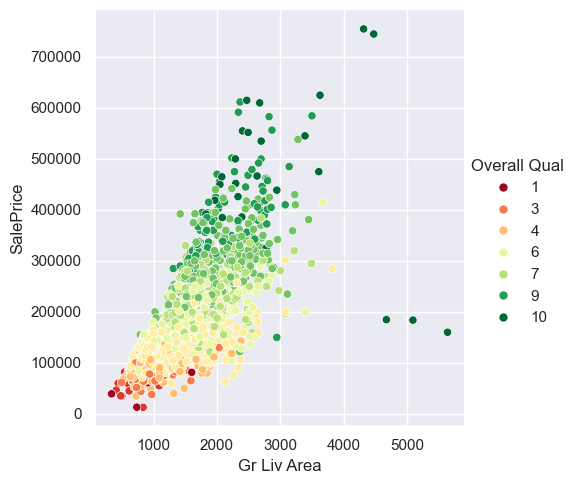

In [16]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn')
plt.show()

The argument 'RdYlGn' contains three abbreviations:

- Rd: red
- Yl: yellow
- Gn: green

The argument 'RdYlGn' as a whole describes a color palette that starts with red, goes through yellow, and ends with green. Below, we see a few color palettes:

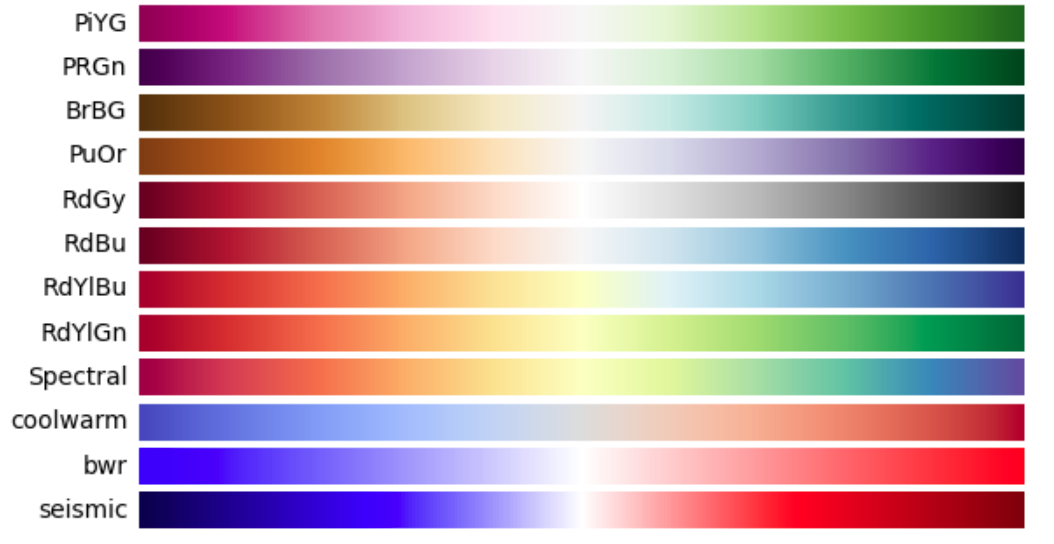

We can see the color code to the left of each palette — this is the code that we can input into the palette parameter. The color palette we used for our scatter plot ('RdYlGn') is the fifth one from the bottom.

We can find all the available color palettes in Matplotlib's [documentation](https://matplotlib.org/stable/users/explain/colors/colormaps.html#miscellaneous) (remember that Seaborn uses Matplotlib; when you click the documentation link, you'll need to scroll down to find the color palettes).

## Variable Representation: Size

So far, we've seen three ways of representing the values of a variable:

- We represented the values of Gr Liv Area as coordinates on the x-axis.
- We represented the values of SalePrice as coordinates on the y-axis.
- We represented the values of Overall Qual as colors.

Another element we can use to represent values is size. A dot can have a color and x- and y-coordinates, but it can also be larger or smaller. Below, we use a size representation to add the Garage Area variable on the graph — we use the size parameter. Recall that Garage Area describes the garage area in square feet.

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


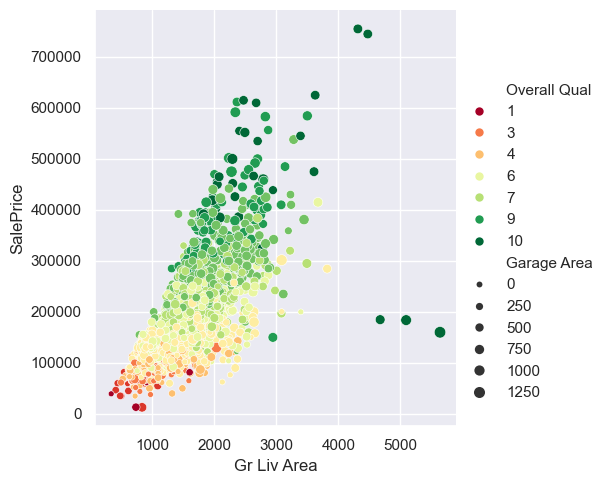

In [17]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area')
plt.show()

To make the size differences more visible, we'll increase the size range — the sizes parameter takes in a tuple specifying the minimum and maximum size.

sns.relplot(data=

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


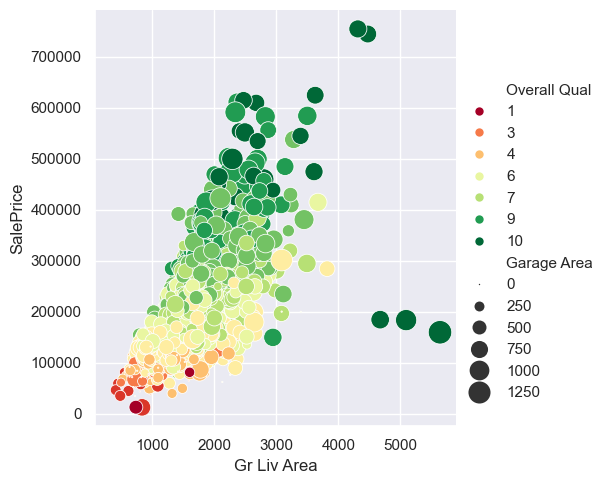

In [18]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300))
plt.show()

The sizes parameter can take in a tuple only if the variable we represent is numerical — Garage Area is a numerical variable. The tuple in sizes represents a range. The minimum value in the range maps to the minimum value in the variable. Similarly, the maximum value in the range maps to the maximum value in the variable.

To control the sizes for a non-numerical (categorical) variable, we need to use a list or a dict. Instead of specifying the range, we need to specify the sizes for each unique value in the variable.

The Rooms variable is categorical, and it has two unique values: '7 rooms or more', and '6 rooms or less'. Below, we pass in the list [200,50] to map '7 rooms or more' to a size of 200 and '6 rooms or less' to a size of 50.

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


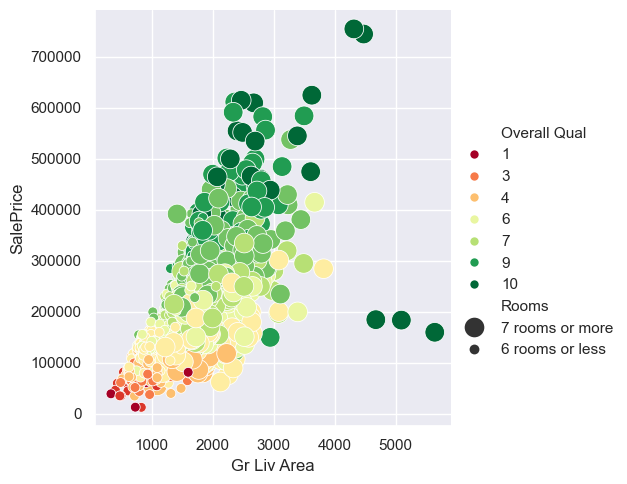

In [19]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Rooms', sizes=[200,50])
plt.show()

If we don't want to control the size, then Seaborn does the size mapping automatically anyway. 

## Variable Representation: Shape

On the previous screen, we visually represented a fourth variable using size. Each circle (dot) on the graph has four properties:

- An x-coordinate
- An y-coordinate
- A color
- A size

Another visual property we can exploit is shape. On the graph we've built, each dot has the shape of a circle. Instead of a circle, however, it could have been a triangle, a square, etc.

More generally, we call the dots on our graphs markers. The marker can take various shapes: circle, triangle, square, etc.

Below, we add the Rooms variable by changing the shape of the markers. A circle now means a house with seven rooms or more, and an "x" sign represents a house with six rooms or less. To make this change, we use the style parameter.

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


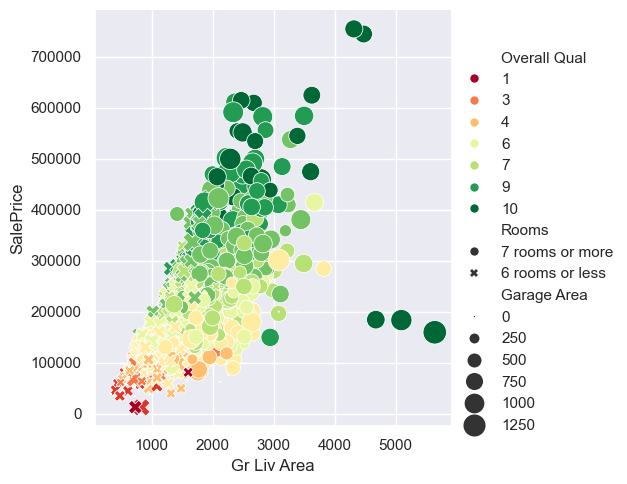

In [20]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms')
plt.show()

By default, Seaborn chose a circle and an "x" sign to represent the values in the Rooms variable. Recall that Rooms has two unique values: '7 rooms or more', and '6 rooms or less'.

If we're not happy with Seaborn's marker choice, we can change the markers' shape. To see the available shapes, we can check Matplotlib's [documentation](https://matplotlib.org/stable/api/markers_api.html).

Below, we add different markers using the markers parameter. Each marker shape has a string representation that we can find in the documentation referenced earlier.

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


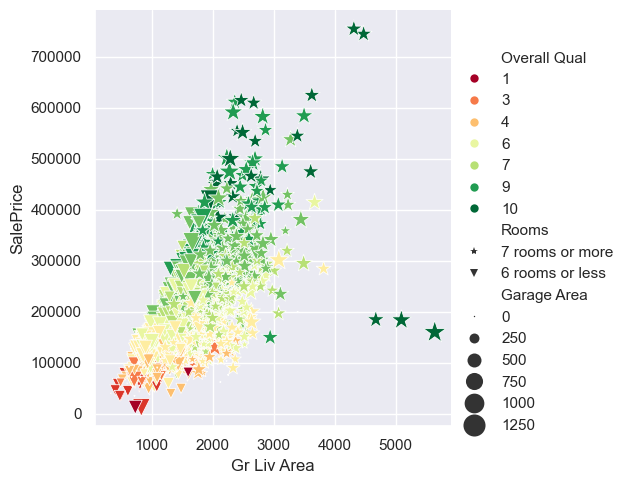

In [21]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1, 300),
            style='Rooms', markers=['*','v'])
plt.show()

Choosing the best markers depends on each graph. For our situation, we need markers that clearly show the small differences in size and color. The star shapes above look nice, but the circles seem to offer a clearer representation in terms of size.

## Variable Representation: Spatial Separation

So far, we've added the following variables on our graph:

- Gr Liv Area: represented with x-coordinates.
- SalePrice: represented with y-coordinates.
- Overal Qual: represented with color.
- Garage Area: represented with size.
- Rooms: represented with shape.

We'll add one more variable by spatially separating the graph based on the values in the Year variable. This variable describes the year when a house was built, and it has only two values: 1999 or older and 2000 or newer. For each value, we'll build a separate graph that will display the five variables we've already plotted.

Below, we add the Year column using the col parameter:



C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


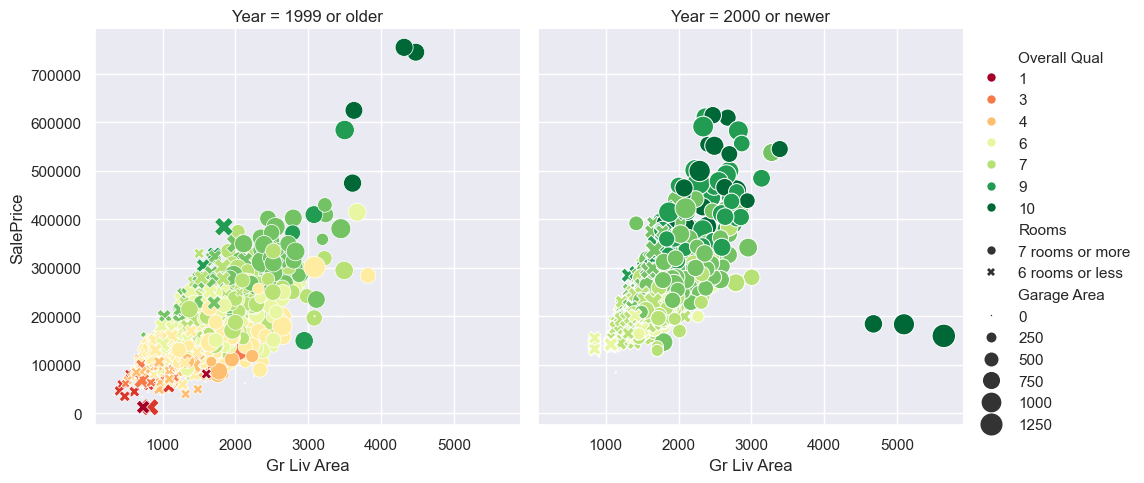

In [22]:
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()

Individually, each graph displays only five variables, but together they show six variables — the Year variable and the other five.

The quantity of information we see in the data visualization above is very large. Each column has 2,930 data points (exception: Garage Area has 2,929), which means we condensed 17,579 data points into one picture.

More importantly, however, we managed to visually represent the relationships between all six variables. Although there's so much information, the graph is readable and shows clear patterns.

The graph we built is essentially a scatter plot. However, because it shows the relationships between so many variables, we call it a relational plot.

We can do much more with Seaborn than just creating relational plots. We've shared a few Seaborn tutorials in the resources section of the takeaways to show you what this library can do.

In this lesson, we learned the following:

- Building relational plots with Seaborn.
- Visually representing multiple variables using x- and y-coordinates, color, size, shape, and spatial separation.
- Identifying patterns by examining a relational plot.